## Bitcoin Prediction Mini Project

In [7]:
# Importing libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from textblob import TextBlob

In [2]:
%pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Loading the bitcoin price data
price_df = pd.read_csv("../Datasets/bitcoin_price.csv")
price_df["Date"] = pd.to_datetime(price_df["Date"])
price_df.set_index("Date",inplace=True)
price_data = price_df[["Close"]]

# Loading the twitter sentiment data
tweet_df = pd.read_csv("../Datasets/btc_tweets.csv")
tweet_df["Date"] = pd.to_datetime(tweet_df["Date"])
tweet_df.set_index("Date", inplace=True)

In [4]:
print(price_df)
print(tweet_df)

                   Close
Date                    
2024-01-01  3.007426e+04
2024-01-02  5.979156e+04
2024-01-03  9.012004e+04
2024-01-04  1.200886e+05
2024-01-05  1.501125e+05
...                  ...
2024-12-26  1.082862e+07
2024-12-27  1.085887e+07
2024-12-28  1.088907e+07
2024-12-29  1.091905e+07
2024-12-30  1.094882e+07

[365 rows x 1 columns]
                                    Tweet
Date                                     
2024-01-01  Bitcoin is going to the moon!
2024-01-01   Bitcoin adoption increasing.
2024-01-01                HODLing strong!
2024-01-02   Bitcoin adoption increasing.
2024-01-02   Not sure about BTC's future.
...                                   ...
2024-12-29  Bitcoin is going to the moon!
2024-12-29             Bear market ahead?
2024-12-30          BTC might crash soon.
2024-12-30             Bear market ahead?
2024-12-30  Bitcoin is going to the moon!

[1095 rows x 1 columns]


In [5]:
# Generating daily sentiment score
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

tweet_df["Sentiment"] = tweet_df["Tweet"].apply(get_sentiment)
daily_sentiment = tweet_df[["Sentiment"]].resample("D").mean().fillna(0)

In [6]:
# Merge price and sentiment data
combined_df = pd.concat([price_data, daily_sentiment], axis=1).fillna(method="ffill")
combined_df

C:\Users\anish\AppData\Local\Temp\ipykernel_20748\631633025.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df = pd.concat([price_data, daily_sentiment], axis=1).fillna(method="ffill")


,Close,Sentiment
Date,,
2024-01-01,3.007426e+04,0.180556
2024-01-02,5.979156e+04,-0.041667
2024-01-03,9.012004e+04,-0.152778
2024-01-04,1.200886e+05,0.000000
2024-01-05,1.501125e+05,0.000000
...,...,...
2024-12-26,1.082862e+07,0.166667
2024-12-27,1.085887e+07,-0.111111
2024-12-28,1.088907e+07,0.305556


In [7]:
# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform the combined dataframe
normalized_data = scaler.fit_transform(combined_df)

# Convert back to DataFrame with same index and column names
normalized_df = pd.DataFrame(normalized_data, index=combined_df.index, columns=combined_df.columns)

normalized_df

,Close,Sentiment
Date,,
2024-01-01,0.000000,0.596774
2024-01-02,0.002722,0.338710
2024-01-03,0.005499,0.209677
2024-01-04,0.008244,0.387097
2024-01-05,0.010994,0.387097
...,...,...
2024-12-26,0.988991,0.580645
2024-12-27,0.991761,0.258065
2024-12-28,0.994527,0.741935


## Full code for implementation of project using LSTM

Epoch 1/25


C:\Users\anish\AppData\Local\Temp\ipykernel_20748\3430245344.py:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df.fillna(method='ffill', inplace=True)   #Forward filling (ffill) replaces  missing values with the last available sentiment value before them.
c:\Users\anish\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1827
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0171
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0110
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0074
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0032
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0019
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.6557e-04
Epoch 8/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.8928e-04
Epoch 9/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.6280e-04
Epoch 10/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.2546e-05
Epoch 11/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.8353e-05
Epoch 12/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.8078e-05
Epoch 13/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.9308e-05
Epoch 14/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.9599e-05
Epoch 15/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.0452e-05
Epoch 16/

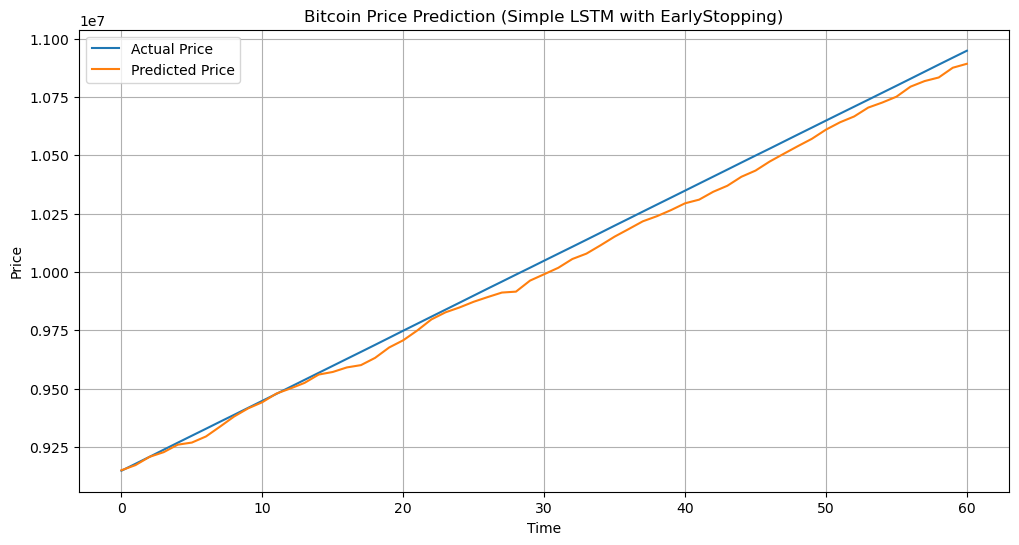

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
The predicted Bitcoin closing price for the next day is: $10915889.00


In [ ]:
# Importing necessay libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from textblob import TextBlob
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
price_df = pd.read_csv("../Datasets/bitcoin_price.csv")
price_df["Date"] = pd.to_datetime(price_df["Date"])
price_df.set_index("Date", inplace=True)
price_data = price_df[["Close"]]

tweet_df = pd.read_csv("../Datasets/btc_tweets.csv")
tweet_df["Date"] = pd.to_datetime(tweet_df["Date"])
tweet_df.set_index("Date", inplace=True)

# Generating daily sentiment score
def get_sentiment(text):
    # Returns polarity score (-1 to 1) for the given tweet text using TextBlob
    return TextBlob(text).sentiment.polarity

tweet_df["Sentiment"] = tweet_df["Tweet"].apply(get_sentiment)       # Apply sentiment function to each tweet
daily_sentiment = tweet_df["Sentiment"].resample("D").mean().fillna(0)  #computes the average daily sentiment score from individual tweet sentiments.

#  Merge price and sentiment data
combined_df = pd.concat([price_data, daily_sentiment], axis=1)
combined_df.columns = ["Close", "Sentiment"]
combined_df.fillna(method='ffill', inplace=True)   #Forward filling (ffill) replaces  missing values with the last available sentiment value before them.

# Scale Features Separately : it is because the range for sentiment is between -1 and 1, so its minmax will be different than the close section whose value range is very high, so fitting them together might get the scaled values distorted
close_scaler = MinMaxScaler()
sentiment_scaler = MinMaxScaler()

# Fit and transform the 'Close' price column
combined_df["Close"] = close_scaler.fit_transform(combined_df[["Close"]])
# Fit and transform the 'Sentiment' column
combined_df["Sentiment"] = sentiment_scaler.fit_transform(combined_df[["Sentiment"]])

# Create Input Sequences for LSTM (multivariate)
def create_sequences(df, time_step=60):
    """
    Create sequences of `time_step` length to use as LSTM input.
    Each sequence contains both Close price and Sentiment features.
    Target is the Close price immediately after the sequence.
    """
    data = df.values  # Convert DataFrame to NumPy array for faster processing, compatibility
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i])  # Input sequence of shape (time_step, features)
        y.append(data[i, 0])              # Target is 'Close' price at next time step (column 0)
    return np.array(X), np.array(y)       # changes X.shape to (num_sequences, time_step, num_features) and y.shape to (num_sequences,)

time_step = 60      # # Using past 60 days to predict next day's price
X, y = create_sequences(combined_df, time_step)

# Train-Test Split (80% train and 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build Simple LSTM Model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(0.2))  # Dropout layer to reduce overfitting by randomly turning off 20% of neurons during training
model.add(Dense(1))      # Output layer with 1 neuron to predict the next day's Close price
model.compile(optimizer='adam', loss='mean_squared_error')

# Setup EarlyStopping
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
# This stops training if loss doesn't improve for 5 epochs and restores the best weights

# Train the Model with EarlyStopping
model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1, callbacks=[early_stop])

# Predict and Inverse Scale 
y_pred = model.predict(X_test)                       # predictions are in the scaled range (between 0 and 1)
y_pred_inv = close_scaler.inverse_transform(y_pred)  # Convert predicted values back to original price scale
y_test_inv = close_scaler.inverse_transform(y_test.reshape(-1, 1))  # y_test.reshape(-1, 1) reshapes it to a 2D array (required by inverse_transform)
                                                                    # convert y_test which is in scaled range (between 0 and 1) back to original scale for comparing with y_pred(our predictions) 


# Evaluate the Model
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))   # RMSE metric (lower is better)
r2 = r2_score(y_test_inv, y_pred_inv)                        # R² metric (closer to 1 is better)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}") 

# Plot Actual vs Predicted Prices
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual Price')      # Plot actual closing prices
plt.plot(y_pred_inv, label='Predicted Price')   # Plot predicted prices by model
plt.title('Bitcoin Price Prediction (Simple LSTM with EarlyStopping)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Predict the next day's Bitcoin price
# Extract last 60 days of features (Close + Sentiment)
last_60_days = combined_df[-time_step:].values  # shape: (60, 2), Slices the last 60 rows of the DataFrame combined_df

# Reshape to match model input: (1 sample, 60 time steps, 2 features)
future_input = last_60_days.reshape(1, time_step, X.shape[2])  # X.shape[2] is 2 (Close, Sentiment), lstm expects a 3D numpy array

# Predict the next day's Close price (scaled)
future_price_scaled = model.predict(future_input)  # outputs  2D array shaped (samples, output_dim) # output_dim is the number of neurons in the output layer

# Inverse transform to get the original price scale
future_price = close_scaler.inverse_transform(future_price_scaled)  # outputs a 2D numpy array

# 5. Print the predicted price
print(f"The predicted Bitcoin closing price for the next day is: ${future_price[0][0]:.2f}")  # future_price[0][0] access the first element of first row in 2D numpy array

